In [8]:
import numpy as np
import scipy as sp
from math import pi

In [19]:
xs = np.arange(-6, 6, 0.01)


def phi(x):
    return (2 * pi) ** (-1 / 2) * np.exp(-1 / 2 * x**2)


def ind(x, lb=-1 / 2, ub=1 / 2):
    return np.where((x >= lb) & (x < ub), 1 / (ub - lb), 0)

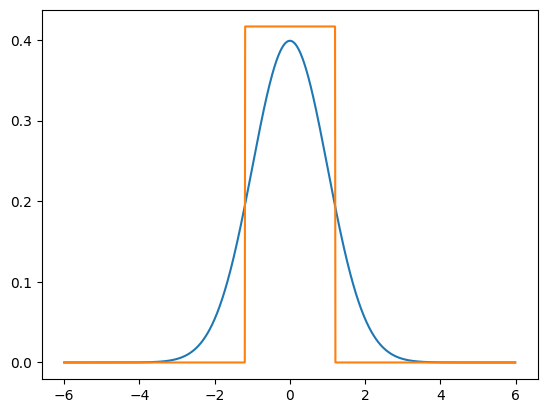

In [22]:
from matplotlib import pyplot as plt


plt.plot(xs, phi(xs))
plt.plot(xs, ind(xs, -1.2, 1.2))

In [110]:
xs = np.sort(sp.stats.norm().rvs(200)).reshape(-1, 1)

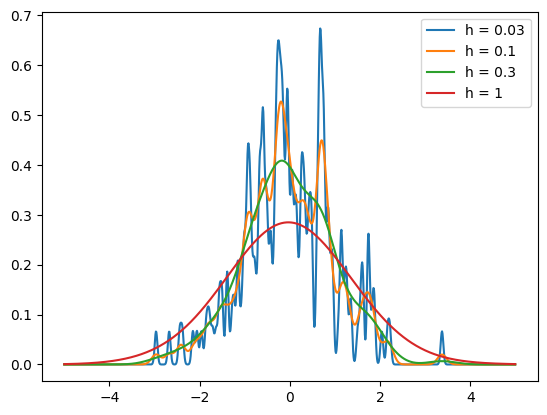

In [111]:
from sklearn.neighbors import KernelDensity
import numpy as np
for bw in [0.03, 0.1, 0.3, 1]:
    kde = KernelDensity(kernel='gaussian', bandwidth=bw).fit(xs)
    grid = np.arange(-5, 5, 0.01).reshape(-1,1)
    dens = np.exp(kde.score_samples(grid))
    plt.plot(grid, dens, label=f"h = {bw}")
plt.legend()
plt.show()

In [112]:
sp.stats.norm().pdf(grid).max()

0.3989422804014327

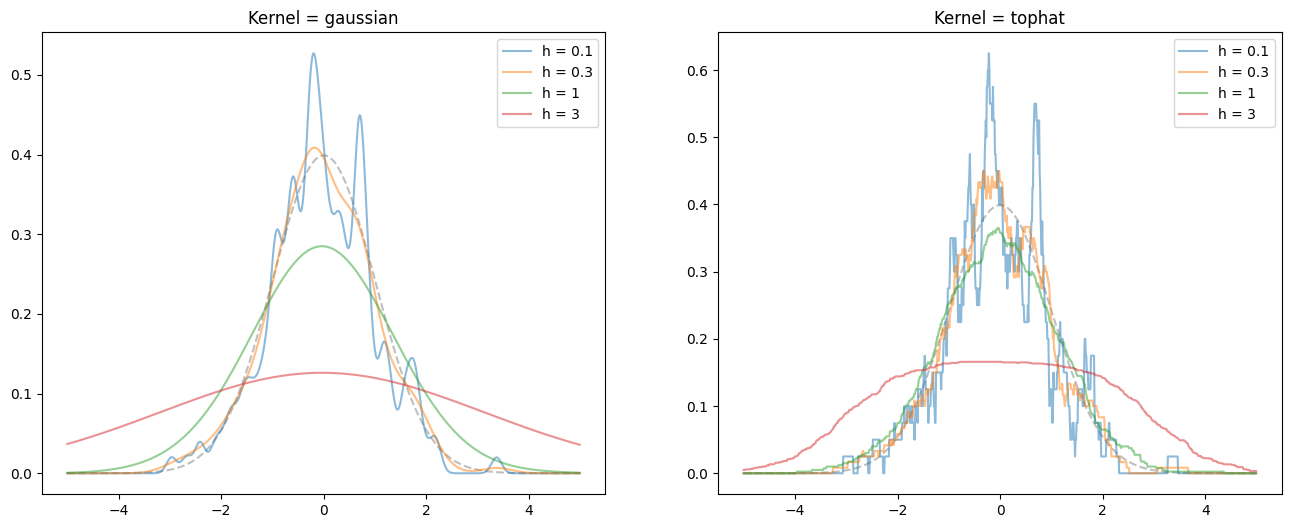

In [114]:
from sklearn.neighbors import KernelDensity
import numpy as np

grid = np.arange(-5, 5, 0.01).reshape(-1, 1)
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
for kernel, ax in zip(["gaussian", "tophat"], axs):
    ax.plot(
        grid, sp.stats.norm().pdf(grid), alpha=0.5, color="gray", linestyle="dashed"
    )
    for bw in [0.1, 0.3, 1, 3]:
        kde = KernelDensity(kernel=kernel, bandwidth=bw).fit(xs)
        dens = np.exp(kde.score_samples(grid))
        ax.plot(grid, dens, label=f"h = {bw}", alpha=0.5)
        ax.set_title(f"Kernel = {kernel}")
        ax.legend()
plt.show()

In [3]:
import numpy as np
import pandas as pd

hs = np.array([0.1, 0.5, 0.9])
ds = np.array([1, 2, 5, 10, 25])
df = pd.DataFrame([(h, d, h**d) for h in hs for d in ds], columns=["h", "d", "h**d"])

In [ ]:
df.unstack